In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleanedDf.csv')
df

,truck_id,route_id,departure_date,estimated_arrival,delay,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,driver_id,...,city_chanceofrain_y,city_chanceoffog_y,city_chanceofsnow_y,city_chanceofthunder_y,combined_datetime_x,date,hour,no_of_vehicles,accident,combined_datetime_y
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:00:00,0,9.0,3000.0,23.0,diesel,94ed3e6d-f,...,0,0,0,0,2019-01-01 13:00:00,2019-01-01,700,1966.000000,0.0,2019-01-01 07:00:00
1,16793343,R-1a802b07,2019-01-01 07:00:00,2019-01-05 17:00:00,1,10.0,15000.0,27.0,diesel,0257f2f2-c,...,0,0,0,0,2019-01-05 17:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
2,16301082,R-d377c549,2019-01-01 07:00:00,2019-01-05 23:00:00,0,11.0,20000.0,26.0,diesel,b38a38cb-a,...,0,0,0,0,2019-01-05 23:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
3,20996187,R-113cebab,2019-01-01 07:00:00,2019-01-05 23:00:00,0,8.0,4000.0,28.0,diesel,ce75c223-e,...,0,0,0,0,2019-01-05 23:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
4,27204262,R-9f601372,2019-01-01 07:00:00,2019-01-06 21:00:00,0,12.0,15000.0,23.0,diesel,f763b55e-0,...,0,0,0,0,2019-01-06 21:00:00,2019-01-01,700,1941.008411,0.0,2019-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,16311717,R-0800a595,2019-02-12 07:00:00,2019-02-13 06:00:00,0,8.0,3000.0,24.0,diesel,664895ce-d,...,0,0,0,0,2019-02-13 06:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00
12603,20724268,R-3dac8163,2019-02-12 07:00:00,2019-02-12 21:00:00,1,8.0,15000.0,24.0,diesel,1fc1302f-9,...,0,0,0,0,2019-02-12 21:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00
12604,21928760,R-5f7269e5,2019-02-12 07:00:00,2019-02-12 15:00:00,0,13.0,6000.0,17.0,gas,87a34a65-1,...,0,0,0,0,2019-02-12 15:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00
12605,29839726,R-bfbffabd,2019-02-12 07:00:00,2019-02-12 09:00:00,0,10.0,20000.0,16.0,gas,163a3367-9,...,0,0,0,0,2019-02-12 09:00:00,2019-02-12,700,1999.000000,0.0,2019-02-12 07:00:00


In [3]:
from scipy.stats import chi2_contingency, pearsonr

def chi_squared_test(df, target, categorical_columns):
    if not categorical_columns:
        print("No categorical columns found for chi-squared test.")
        return pd.DataFrame()
    
    results = {}
    for col in categorical_columns:
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        results[col] = {'chi2': chi2, 'p_value': p_value}
    return pd.DataFrame(results).T.sort_values('chi2', ascending=False)

def pearson_correlation(df, target, numerical_columns):
    if not numerical_columns:
        print("No numerical columns found for Pearson correlation.")
        return pd.DataFrame()
    
    results = {}
    for col in numerical_columns:
        corr, p_value = pearsonr(df[col], df[target])
        results[col] = {'correlation': corr, 'p_value': p_value}
    return pd.DataFrame(results).T.sort_values('correlation', ascending=False)

# Print information about the dataset
print("Dataset information:")
print(df.info())

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()

# Remove target from feature columns if it's included
target_column = 'delay'  # Assuming 'delay' is your target column
categorical_columns = [col for col in categorical_columns if col != target_column]
numerical_columns = [col for col in numerical_columns if col != target_column]

print("\nCategorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

# Perform Chi-squared test for categorical features
chi_squared_results = chi_squared_test(df, target_column, categorical_columns)
if not chi_squared_results.empty:
    print("\nChi-squared test results:")
    print(chi_squared_results)

# Perform Pearson correlation for numerical features
correlation_results = pearson_correlation(df, target_column, numerical_columns)
if not correlation_results.empty:
    print("\nPearson correlation results:")
    print(correlation_results)

# You can set a threshold to select significant features
chi_squared_threshold = 0.05  # p-value threshold
correlation_threshold = 0.1  # absolute correlation threshold

significant_categorical = chi_squared_results[chi_squared_results['p_value'] < chi_squared_threshold].index.tolist() if not chi_squared_results.empty else []
significant_numerical = correlation_results[abs(correlation_results['correlation']) > correlation_threshold].index.tolist() if not correlation_results.empty else []

print("\nSignificant categorical features:", significant_categorical)
print("Significant numerical features:", significant_numerical)


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12607 entries, 0 to 12606
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   truck_id                12607 non-null  int64  
 1   route_id                12607 non-null  object 
 2   departure_date          12607 non-null  object 
 3   estimated_arrival       12607 non-null  object 
 4   delay                   12607 non-null  int64  
 5   truck_age               12607 non-null  float64
 6   load_capacity_pounds    12607 non-null  float64
 7   mileage_mpg             12607 non-null  float64
 8   fuel_type               12607 non-null  object 
 9   driver_id               12607 non-null  object 
 10  name                    12607 non-null  object 
 11  gender                  12607 non-null  object 
 12  age                     12607 non-null  float64
 13  experience              12607 non-null  float64
 14  driving_style    

C:\Users\sriva\AppData\Local\Temp\ipykernel_30492\1855577385.py:22: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(df[col], df[target])


In [4]:
#Converts all columns with 'date' in their name to datetime format
date_columns = [col for col in df.columns if 'date' in col.lower()]
for col in date_columns:
    print(col)
    df[col] = pd.to_datetime(df[col], errors='coerce') 
    
df['estimated_arrival']=pd.to_datetime(df['estimated_arrival'], errors='coerce') 
print('estimated_arrival')

departure_date
Date
city_date_x
city_date_y
combined_datetime_x
date
combined_datetime_y
estimated_arrival


In [5]:
#Calculate time difference in hours between departure_date and estimated_arrival
if 'departure_date' in df.columns and 'estimated_arrival' in df.columns:
    df['travel_time_hours'] = (df['estimated_arrival'] - df['departure_date']).dt.total_seconds() / 3600
df['travel_time_hours']

0          6.0
1        106.0
2        112.0
3        112.0
4        134.0
         ...  
12602     23.0
12603     14.0
12604      8.0
12605      2.0
12606     18.0
Name: travel_time_hours, Length: 12607, dtype: float64

In [6]:
# Convert 'departure_date' to datetime format
df['estimated_arrival'] = pd.to_datetime(df['estimated_arrival'], errors='coerce')

# Extract day of the week (0=Monday, 6=Sunday)
df['day_of_week_estimated_arrival'] = df['estimated_arrival'].dt.dayofweek

# Extract day of the month
df['day_of_month_estimated_arrival'] = df['estimated_arrival'].dt.day

# Extract hour
df['hour_estimated_arrival'] = df['estimated_arrival'].dt.hour

# Display the resulting DataFrame
print(df[['estimated_arrival', 'day_of_week_estimated_arrival', 'day_of_month_estimated_arrival', 'hour_estimated_arrival']])


        estimated_arrival  day_of_week_estimated_arrival  \
0     2019-01-01 13:00:00                              1   
1     2019-01-05 17:00:00                              5   
2     2019-01-05 23:00:00                              5   
3     2019-01-05 23:00:00                              5   
4     2019-01-06 21:00:00                              6   
...                   ...                            ...   
12602 2019-02-13 06:00:00                              2   
12603 2019-02-12 21:00:00                              1   
12604 2019-02-12 15:00:00                              1   
12605 2019-02-12 09:00:00                              1   
12606 2019-02-13 01:00:00                              2   

       day_of_month_estimated_arrival  hour_estimated_arrival  
0                                   1                      13  
1                                   5                      17  
2                                   5                      23  
3                      

In [7]:
# Convert 'departure_date' to datetime format
df['departure_date'] = pd.to_datetime(df['departure_date'], errors='coerce')

# Extract day of the week (0=Monday, 6=Sunday)
df['day_of_week_departure'] = df['departure_date'].dt.dayofweek

# Extract day of the month
df['day_of_month_departure'] = df['departure_date'].dt.day

# Extract hour
df['hour_departure'] = df['departure_date'].dt.hour

# Display the resulting DataFrame
print(df[['departure_date', 'day_of_week_departure', 'day_of_month_departure', 'hour_departure']])


           departure_date  day_of_week_departure  day_of_month_departure  \
0     2019-01-01 07:00:00                      1                       1   
1     2019-01-01 07:00:00                      1                       1   
2     2019-01-01 07:00:00                      1                       1   
3     2019-01-01 07:00:00                      1                       1   
4     2019-01-01 07:00:00                      1                       1   
...                   ...                    ...                     ...   
12602 2019-02-12 07:00:00                      1                      12   
12603 2019-02-12 07:00:00                      1                      12   
12604 2019-02-12 07:00:00                      1                      12   
12605 2019-02-12 07:00:00                      1                      12   
12606 2019-02-12 07:00:00                      1                      12   

       hour_departure  
0                   7  
1                   7  
2              

In [8]:
# Convert 'city_date_y' to datetime format
df['city_date_y'] = pd.to_datetime(df['city_date_y'], errors='coerce')

# Extract day of the week (0=Monday, 6=Sunday)
df['day_of_week_city_y'] = df['city_date_y'].dt.dayofweek

# Extract day of the month
df['day_of_month_city_y'] = df['city_date_y'].dt.day

# Extract hour
df['hour_departure_city_y'] = df['city_date_y'].dt.hour

# Display the resulting DataFrame
print(df[['city_date_y', 'day_of_week_city_y', 'day_of_month_city_y', 'hour_departure_city_y']])

      city_date_y  day_of_week_city_y  day_of_month_city_y  \
0      2019-01-01                   1                    1   
1      2019-01-05                   5                    5   
2      2019-01-05                   5                    5   
3      2019-01-05                   5                    5   
4      2019-01-06                   6                    6   
...           ...                 ...                  ...   
12602  2019-02-13                   2                   13   
12603  2019-02-12                   1                   12   
12604  2019-02-12                   1                   12   
12605  2019-02-12                   1                   12   
12606  2019-02-13                   2                   13   

       hour_departure_city_y  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
12602                      0  
12603  

In [9]:
# Convert 'city_date_x' to datetime format
df['city_date_x'] = pd.to_datetime(df['city_date_x'], errors='coerce')

# Extract day of the week (0=Monday, 6=Sunday)
df['day_of_week_city_x'] = df['city_date_x'].dt.dayofweek

# Extract day of the month
df['day_of_month_city_x'] = df['city_date_x'].dt.day

# Extract hour
df['hour_departure_city_x'] = df['city_date_x'].dt.hour

# Display the resulting DataFrame
print(df[['city_date_x', 'day_of_week_city_x', 'day_of_month_city_x', 'hour_departure_city_x']])

      city_date_x  day_of_week_city_x  day_of_month_city_x  \
0      2019-01-01                   1                    1   
1      2019-01-01                   1                    1   
2      2019-01-01                   1                    1   
3      2019-01-01                   1                    1   
4      2019-01-01                   1                    1   
...           ...                 ...                  ...   
12602  2019-02-12                   1                   12   
12603  2019-02-12                   1                   12   
12604  2019-02-12                   1                   12   
12605  2019-02-12                   1                   12   
12606  2019-02-12                   1                   12   

       hour_departure_city_x  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
12602                      0  
12603  

drop estimated_arrival, departure_date,Date,date,combined_datetime_y,combined_datetime_x, city_date_y

In [22]:
df2 = df.drop(columns=['city_date_y','city_date_x','estimated_arrival','departure_date','Date','date','combined_datetime_y','combined_datetime_x'])

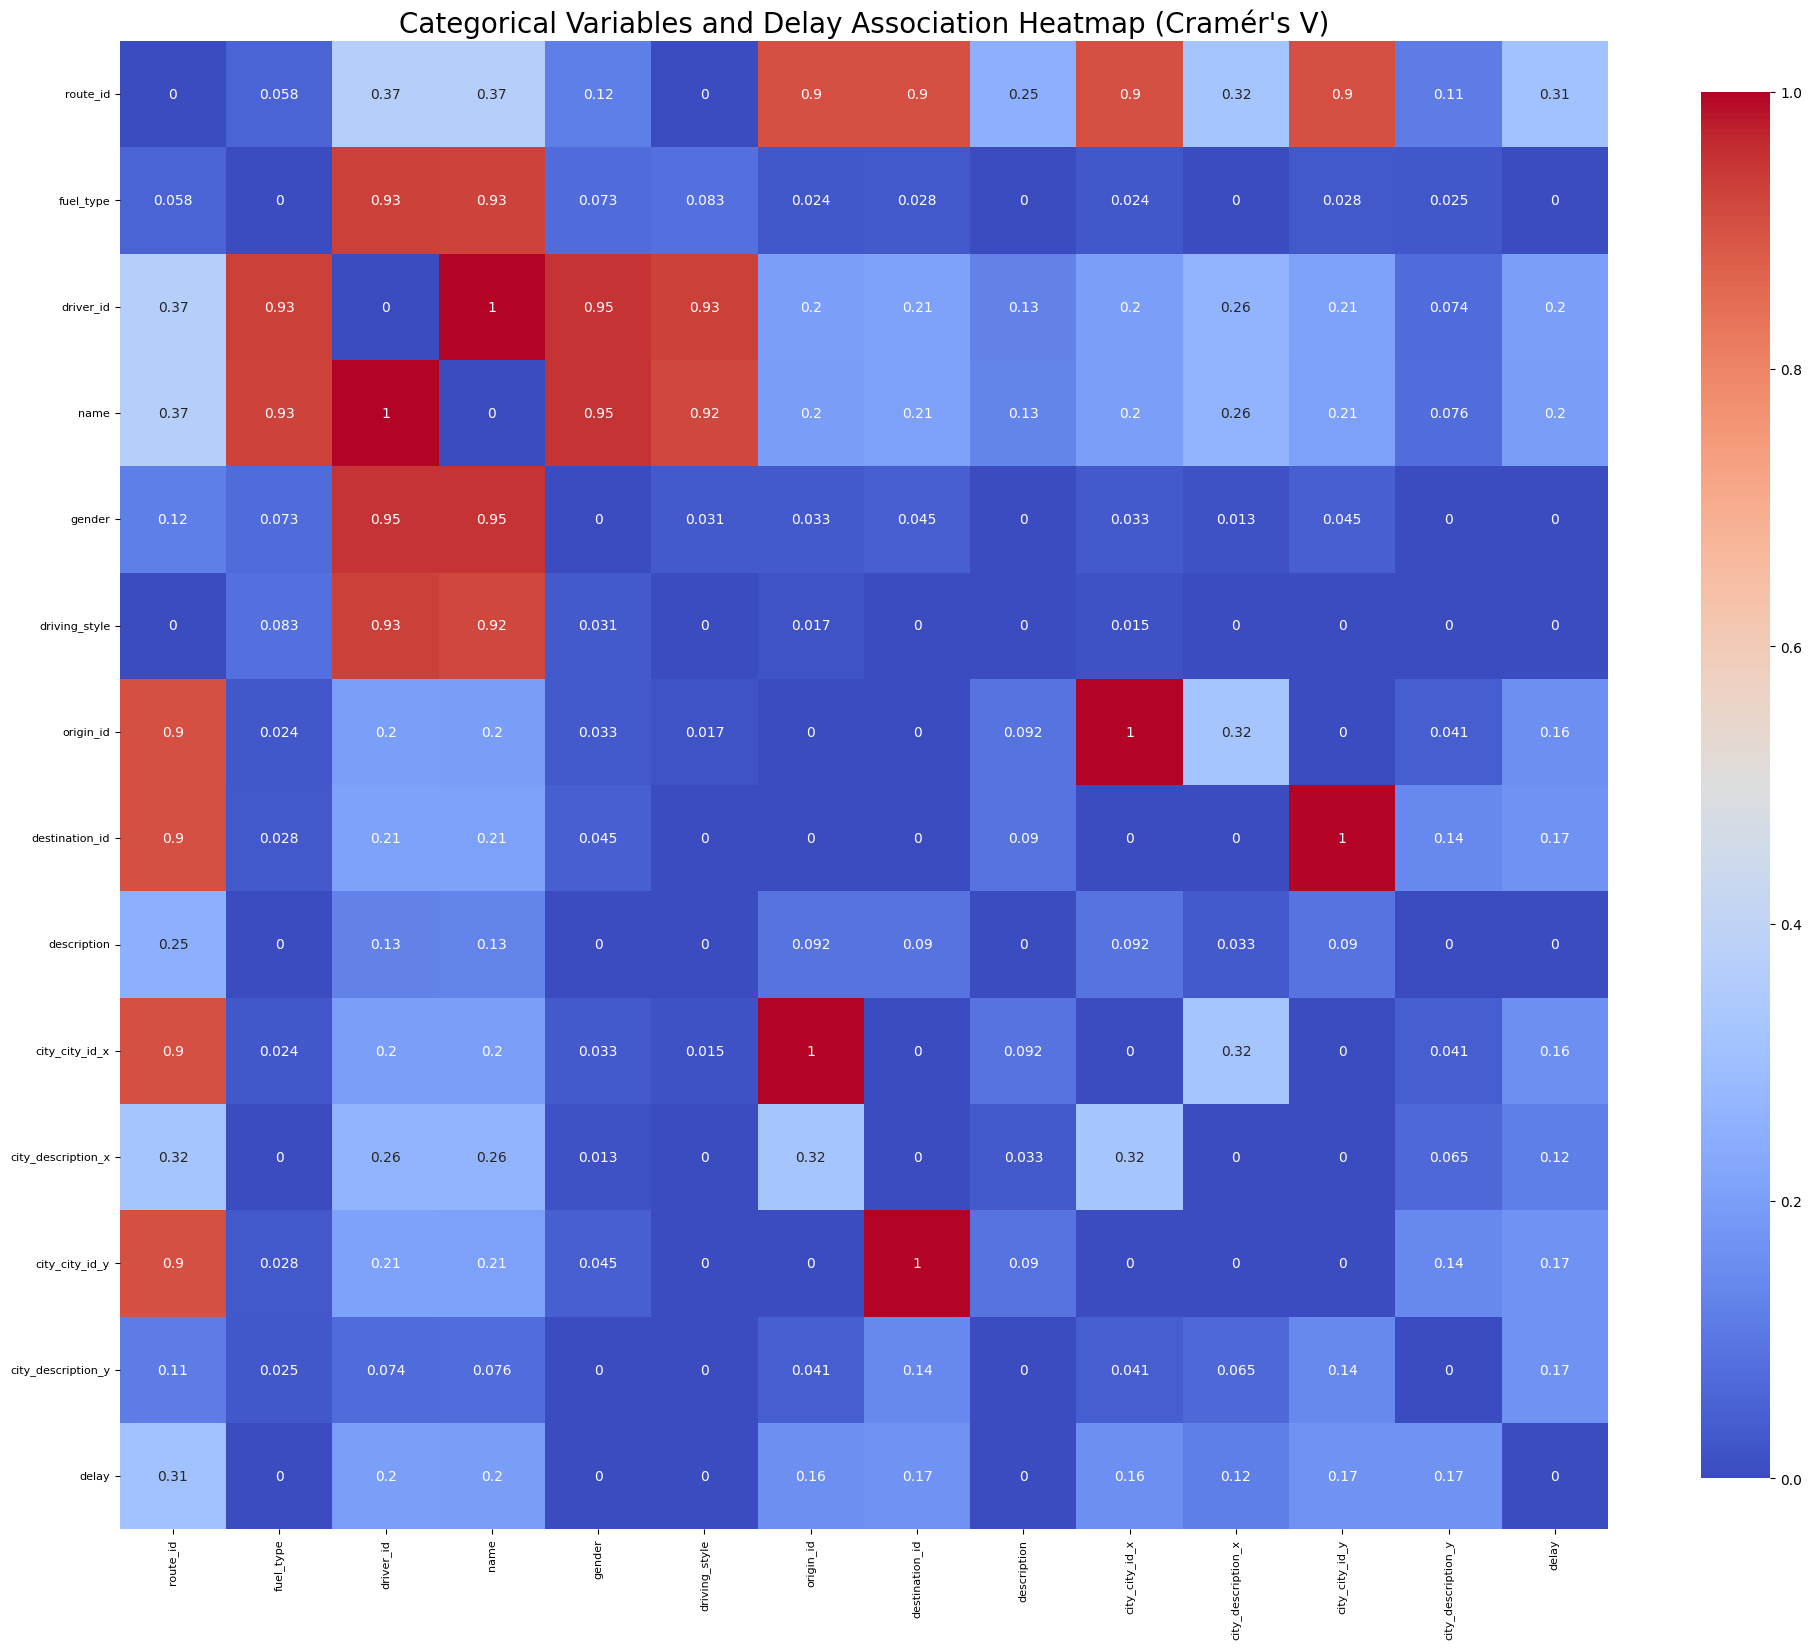

In [11]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Adding 'delay' to the list of categorical columns
categorical_columns.append('delay')

n = len(categorical_columns)
assoc_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            assoc_matrix[i, j] = cramers_v(df[categorical_columns[i]], df[categorical_columns[j]])

assoc_df = pd.DataFrame(assoc_matrix, index=categorical_columns, columns=categorical_columns)

# Create the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(assoc_df, annot=True, cmap='coolwarm', vmin=0, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title('Categorical Variables and Delay Association Heatmap (Cramér\'s V)', fontsize=20)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

based on the heatmap: fuel_type, name(== driver_id), gender, driving_style,description have 0 relation to delay

In [23]:
df2=df2.drop(columns=['fuel_type','name','gender','driving_style','description'])

In [25]:
df2= df2.drop(columns=['truck_id','vehicle_no','driver_id','route_id','city_city_id_y','city_city_id_x','destination_id','origin_id'])

In [26]:
# Select numerical columns
numerical_columns = df2.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()

# Calculate correlations with 'delay'
correlations = [df2[column].corr(df['delay']) for column in numerical_columns]

# Create a Series from the correlations list
correlations_series = pd.Series(correlations, index=numerical_columns)

# Sort correlations by absolute value in descending order
sorted_correlations = correlations_series.abs().sort_values(ascending=False)

# Print the correlations
print("Correlations with 'delay' for numerical variables:")
for column, correlation in sorted_correlations.items():
    print(f"{column}: {correlation:.4f}")


Correlations with 'delay' for numerical variables:
delay: 1.0000
average_hours: 0.2949
distance: 0.2949
hour_estimated_arrival: 0.2213
city_hour_y: 0.2213
travel_time_hours: 0.1995
city_visibility_y: 0.1142
city_humidity_y: 0.0906
day_of_month_departure: 0.0862
day_of_month_city_x: 0.0862
city_precip_y: 0.0616
city_wind_speed_y: 0.0375
city_wind_speed_x: 0.0345
experience: 0.0202
day_of_week_city_y: 0.0199
day_of_week_estimated_arrival: 0.0199
city_pressure_y: 0.0191
visibility: 0.0187
day_of_month_city_y: 0.0174
day_of_month_estimated_arrival: 0.0174
day_of_week_city_x: 0.0172
day_of_week_departure: 0.0172
city_temp_y: 0.0151
age: 0.0148
no_of_vehicles: 0.0141
temp: 0.0123
mileage_mpg: 0.0116
city_temp_x: 0.0108
humidity: 0.0095
average_speed_mph: 0.0092
accident: 0.0090
pressure: 0.0080
precip: 0.0071
city_visibility_x: 0.0068
load_capacity_pounds: 0.0060
city_pressure_x: 0.0059
wind_speed: 0.0051
city_precip_x: 0.0044
truck_age: 0.0043
ratings: 0.0043
city_humidity_x: 0.0041
chanceo

c:\AIML\mlEnv\mlEnv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\AIML\mlEnv\mlEnv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [28]:
# Identify columns with NaN correlation values
nan_columns = correlations_series[correlations_series.isna()].index.tolist()

# Print the columns with NaN correlation values
print("Columns with NaN correlation with 'delay':", nan_columns)

# Drop columns with NaN correlation values from the DataFrame
df2 = df2.drop(columns=nan_columns)

# Optionally, print the cleaned DataFrame or its remaining columns
print("Remaining columns after dropping NaN correlations:", df.columns.tolist())

# Sort correlations by absolute value in descending order (excluding NaNs)
sorted_correlations = correlations_series.dropna().abs().sort_values(ascending=False)



Columns with NaN correlation with 'delay': ['chanceofrain', 'chanceoffog', 'chanceofsnow', 'chanceofthunder', 'city_hour_x', 'city_chanceofrain_x', 'city_chanceoffog_x', 'city_chanceofsnow_x', 'city_chanceofthunder_x', 'city_chanceofrain_y', 'city_chanceoffog_y', 'city_chanceofsnow_y', 'city_chanceofthunder_y', 'hour', 'hour_departure', 'hour_departure_city_y', 'hour_departure_city_x']


KeyError: "['chanceofrain', 'chanceoffog', 'chanceofsnow', 'chanceofthunder', 'city_hour_x', 'city_chanceofrain_x', 'city_chanceoffog_x', 'city_chanceofsnow_x', 'city_chanceofthunder_x', 'city_chanceofrain_y', 'city_chanceoffog_y', 'city_chanceofsnow_y', 'city_chanceofthunder_y', 'hour', 'hour_departure', 'hour_departure_city_y', 'hour_departure_city_x'] not found in axis"

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12607 entries, 0 to 12606
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   delay                           12607 non-null  int64  
 1   truck_age                       12607 non-null  float64
 2   load_capacity_pounds            12607 non-null  float64
 3   mileage_mpg                     12607 non-null  float64
 4   age                             12607 non-null  float64
 5   experience                      12607 non-null  float64
 6   ratings                         12607 non-null  float64
 7   average_speed_mph               12607 non-null  float64
 8   distance                        12607 non-null  float64
 9   average_hours                   12607 non-null  float64
 10  temp                            12607 non-null  float64
 11  wind_speed                      12607 non-null  float64
 12  precip                          

In [30]:
# Step 1: Get a list of columns with type object
object_columns = df2.select_dtypes(include=['object']).columns.tolist()

# Print the list of object columns
print("Object columns:", object_columns)



Object columns: ['city_description_x', 'city_description_y']


In [31]:
# Encode categorical variables
# One-Hot Encoding
df2 = pd.get_dummies(df2, columns=object_columns, drop_first=True)

'''# Option 2: Label Encoding (if you prefer to use LabelEncoder)
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder if needed later

# Print the DataFrame after encoding
print("DataFrame after One-Hot Encoding:\n", df_encoded_onehot)
print("DataFrame after Label Encoding:\n", df)'''

'# Option 2: Label Encoding (if you prefer to use LabelEncoder)\nfrom sklearn.preprocessing import LabelEncoder\n\nlabel_encoders = {}\nfor col in object_columns:\n    le = LabelEncoder()\n    df[col] = le.fit_transform(df[col])\n    label_encoders[col] = le  # Store the encoder if needed later\n\n# Print the DataFrame after encoding\nprint("DataFrame after One-Hot Encoding:\n", df_encoded_onehot)\nprint("DataFrame after Label Encoding:\n", df)'

In [32]:
df2.info(verbose=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12607 entries, 0 to 12606
Data columns (total 117 columns):
 #    Column                                                       Dtype  
---   ------                                                       -----  
 0    delay                                                        int64  
 1    truck_age                                                    float64
 2    load_capacity_pounds                                         float64
 3    mileage_mpg                                                  float64
 4    age                                                          float64
 5    experience                                                   float64
 6    ratings                                                      float64
 7    average_speed_mph                                            float64
 8    distance                                                     float64
 9    average_hours                                              

In [33]:
datetime_columns = df2.select_dtypes(include=['datetime64[ns]']).columns.tolist()
df2=df2.drop(columns=datetime_columns)

In [34]:
df2.info(verbose=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12607 entries, 0 to 12606
Data columns (total 117 columns):
 #    Column                                                       Dtype  
---   ------                                                       -----  
 0    delay                                                        int64  
 1    truck_age                                                    float64
 2    load_capacity_pounds                                         float64
 3    mileage_mpg                                                  float64
 4    age                                                          float64
 5    experience                                                   float64
 6    ratings                                                      float64
 7    average_speed_mph                                            float64
 8    distance                                                     float64
 9    average_hours                                              

In [35]:
df2.to_csv("final_data2.csv",index=False)